In [2]:
pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.1 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.0 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   ----------------------

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Adjust path to use Windows-compatible format
base_path = os.path.join("data", "raw")

# Load vendors data
with open(os.path.join(base_path, "vendors_2025_07_26.json")) as f:
    vendors_data = json.load(f)
vendors_df = pd.DataFrame(vendors_data)

# Load shipments data
with open(os.path.join(base_path, "shipments_2025_07_26.json")) as f:
    shipments_data = json.load(f)
shipments_df = pd.DataFrame(shipments_data)


In [ ]:
#Step 4: Initial Exploration

In [6]:
print(vendors_df.head())
print(shipments_df.head())

vendors_df.info()
shipments_df.info()

vendors_df.describe()
shipments_df.describe()


  vendor_id                          name         location  rating  \
0  VENDOR_1     Cooper, Watts and Farrell          Kington     3.3   
1  VENDOR_2                 Cook and Sons        Evanmouth     8.6   
2  VENDOR_3  Mckee, Gardner and Davenport      South David     7.6   
3  VENDOR_4     Wright, Garcia and Deleon      Dicksonberg     6.9   
4  VENDOR_5                 Johnson-Doyle  Kimberlychester     6.7   

                contact_email  
0    waltersmaria@example.org  
1        hhoffman@example.org  
2       michael05@example.org  
3  michellecherry@example.org  
4      josephcobb@example.org  
                            shipment_id vendor_id    product_id  quantity  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  VENDOR_7  PRODUCT_1006        86   
1  bc8960a9-23b8-41e9-b924-56de3eb13b90  VENDOR_8  PRODUCT_1001        88   
2  8b9d2434-e465-4150-bd9c-66b3ad3c2d6d  VENDOR_1  PRODUCT_1000        37   
3  07a0ca6e-0822-48f3-ac03-1199972a8469  VENDOR_4  PRODUCT_1003        25   
4 

,quantity
count,100.000000
mean,52.770000
std,30.339112
min,1.000000
25%,23.750000
50%,58.000000
75%,79.000000
max,100.000000


In [8]:
#Missing Values Check

In [7]:
print("Vendors Missing Values:\n", vendors_df.isnull().sum())
print("Shipments Missing Values:\n", shipments_df.isnull().sum())


Vendors Missing Values:
 vendor_id        0
name             0
location         0
rating           0
contact_email    0
dtype: int64
Shipments Missing Values:
 shipment_id      0
vendor_id        0
product_id       0
quantity         0
shipment_date    0
status           0
dtype: int64


In [10]:
#Key Visuals

### Shipment Volume Over Time

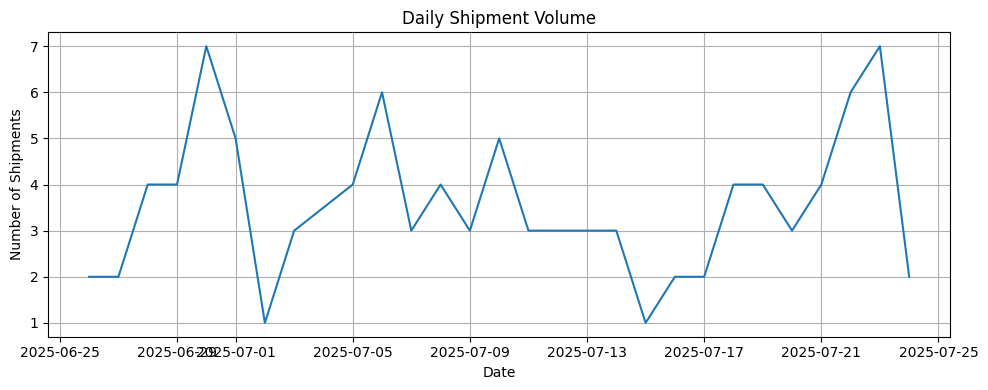

In [9]:
shipments_df['shipment_date'] = pd.to_datetime(shipments_df['shipment_date'])
shipments_df.groupby(shipments_df['shipment_date'].dt.date).size().plot(kind='line', figsize=(10, 4))
plt.title('Daily Shipment Volume')
plt.xlabel('Date')
plt.ylabel('Number of Shipments')
plt.grid(True)
plt.tight_layout()
plt.show()


### Top Vendors by Shipment Count

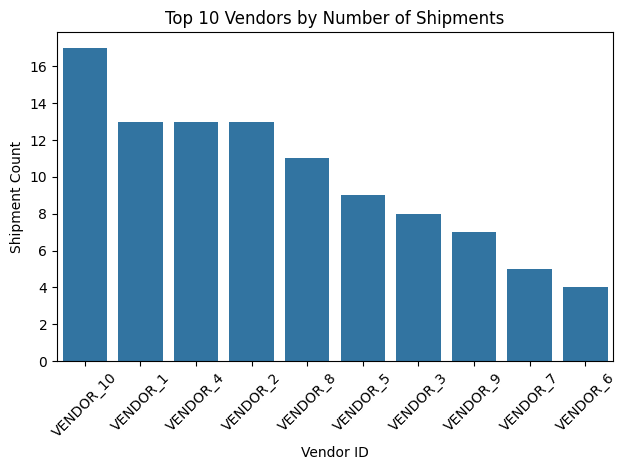

In [11]:
top_vendors = shipments_df['vendor_id'].value_counts().head(10)
sns.barplot(x=top_vendors.index, y=top_vendors.values)
plt.title('Top 10 Vendors by Number of Shipments')
plt.xlabel('Vendor ID')
plt.ylabel('Shipment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
